In [1]:
def eda_relationships(df, target_col="lung_cancer"):
    """
    Explore deeper relationships between features:
    - Correlation heatmap for numeric features
    - Countplots for categorical vs target
    - Boxplots for numeric vs target
    - Pairplot for selected features
    Dark theme is applied for better visual comfort.
    """

    # 🌙 Dark theme
    sns.set_theme(style="darkgrid", palette="dark")
    plt.style.use("dark_background")

    # Select numeric and categorical columns
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("patient_id", errors="ignore")
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns.drop(target_col, errors="ignore")

    # --- Correlation Heatmap ---
    plt.figure(figsize=(8, 6))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap="mako", center=0, linewidths=.5)
    plt.title("Correlation Heatmap (Numeric Features)", fontsize=14, color="w")
    plt.show()

    # --- Categorical vs Target ---
    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col, hue=target_col, palette="viridis")
        plt.title(f"{col} vs {target_col}", fontsize=14, color="w")
        plt.xticks(rotation=30)
        plt.show()

    # --- Numeric vs Target (Boxplots) ---
    for col in numeric_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=target_col, y=col, palette="plasma")
        plt.title(f"{col} Distribution by {target_col}", fontsize=14, color="w")
        plt.show()

    # --- Pairplot (Relationships) ---
    selected_features = list(numeric_cols) + [target_col]
    sns.pairplot(df[selected_features], hue=target_col, palette="cubehelix", diag_kind="kde")
    plt.suptitle("Pairwise Relationships", y=1.02, color="w", fontsize=14)
    plt.show()

In [2]:
def eda_relationships(df, target_col="lung_cancer"):
    """
    Explore deeper relationships between features:
    - Correlation heatmap for numeric features
    - Countplots for categorical vs target
    - Boxplots for numeric vs target
    - Pairplot for selected features
    Dark theme is applied for better visual comfort.
    """

    # ☀️ White theme
    sns.set_theme(style="whitegrid", palette="pastel")
    plt.style.use("default")

    # Select numeric and categorical columns
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("patient_id", errors="ignore")
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns.drop(target_col, errors="ignore")

    # --- Correlation Heatmap ---
    plt.figure(figsize=(8, 6))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap="mako", center=0, linewidths=.5)
    plt.title("Correlation Heatmap (Numeric Features)", fontsize=14, color="w")
    plt.show()

    # --- Categorical vs Target ---
    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col, hue=target_col, palette="viridis")
        plt.title(f"{col} vs {target_col}", fontsize=14, color="w")
        plt.xticks(rotation=30)
        plt.show()

    # --- Numeric vs Target (Boxplots) ---
    for col in numeric_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=target_col, y=col, palette="plasma")
        plt.title(f"{col} Distribution by {target_col}", fontsize=14, color="w")
        plt.show()

    # --- Pairplot (Relationships) ---
    selected_features = list(numeric_cols) + [target_col]
    sns.pairplot(df[selected_features], hue=target_col, palette="cubehelix", diag_kind="kde")
    plt.suptitle("Pairwise Relationships", y=1.02, color="w", fontsize=14)
    plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt #for vasulaization
import seaborn as sns #for vasulaization
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu

#machine learning library
from sklearn.model_selection import train_test_split #=> split data to trian & test
#from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
#DeepLearning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

In [5]:

def eda_summary(filepath=None, df=None):
    """
    Function to perform basic EDA steps:
    - Read CSV (if filepath provided)
    - Show head of data
    - Show missing values
    - Show duplicated values
    - Show shape
    - Describe data
    - Show info (numerical/categorical)
    - Show NULL percentage per column
    """
    # read file path in kaggle
    if filepath is not None:
        df = pd.read_csv(filepath)
    elif df is None:
        raise ValueError("Please provide either a CSV filepath or a DataFrame.")

    print("\n--- First 5 Rows ---")
    display(df.head())

    print("\n--- Missing Values ---")
    print(df.isnull().sum())

    print("\n--- Duplicated Rows ---")
    print(df.duplicated().sum())

    print("\n--- Shape ---")
    print(df.shape)

    print("\n--- Description ---")
    display(df.describe(include='all'))

    print("\n--- Data Info ---")
    df.info()

    print("\n--- NULL Percentage ---")
    data_null = round(df.isna().sum() / df.shape[0] * 100, 2)
    display(data_null.to_frame(name='Percent NULL data (%)'))

    return df

In [6]:
def eda_report(filepath=None, df=None):
    """
    Generate an EDA summary report for a dataset:
    - Missing values (count & %)
    - Duplicated rows (overall count)
    - Column data types
    - Unique values count
    """
    # read DataFrame File
    if filepath is not None:
        df = pd.read_csv(filepath)
    elif df is None:
        raise ValueError("Please provide either a CSV filepath or a DataFrame.")

    # summarize
    report = pd.DataFrame({
        "Data Type": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Missing %": round(df.isnull().sum() / len(df) * 100, 2),
        "Unique Values": df.nunique()
    })

    # Specify column type (numeric/text/other)
    report["Column Type"] = report["Data Type"].apply(
        lambda x: "Numeric" if pd.api.types.is_numeric_dtype(x)
        else "Categorical" if pd.api.types.is_string_dtype(x)
        else "Other"
    )

    # Add the number of duplicate rows in the last row
    duplicates = df.duplicated().sum()
    summary_row = pd.DataFrame({
        "Data Type": ["-"],
        "Missing Values": ["-"],
        "Missing %": ["-"],
        "Unique Values": ["-"],
        "Column Type": ["-"]
    }, index=["Duplicated Rows = " + str(duplicates)])

    report = pd.concat([report, summary_row])

    return report

In [7]:
eda_report(filepath="/content/drive/MyDrive/Data mining project/lung_cancer_prediction.csv")

,Data Type,Missing Values,Missing %,Unique Values,Column Type
Country,object,0,0.0,30,Categorical
Age,int64,0,0.0,61,Numeric
Gender,object,0,0.0,2,Categorical
Smoking_Status,object,0,0.0,3,Categorical
Second_Hand_Smoke,object,0,0.0,2,Categorical
Air_Pollution_Exposure,object,0,0.0,3,Categorical
Occupation_Exposure,object,0,0.0,2,Categorical
Rural_or_Urban,object,0,0.0,2,Categorical
Socioeconomic_Status,object,0,0.0,3,Categorical
Healthcare_Access,object,0,0.0,3,Categorical


In [8]:
#read file from function
df = eda_summary(filepath="/content/drive/MyDrive/Data mining project/lung_cancer_prediction.csv")


--- First 5 Rows ---


,Country,Age,Gender,Smoking_Status,Second_Hand_Smoke,Air_Pollution_Exposure,Occupation_Exposure,Rural_or_Urban,Socioeconomic_Status,Healthcare_Access,...,Treatment_Access,Clinical_Trial_Access,Language_Barrier,Mortality_Risk,5_Year_Survival_Probability,Delay_in_Diagnosis,Family_History,Indoor_Smoke_Exposure,Tobacco_Marketing_Exposure,Final_Prediction
0,Russia,82,Male,Former Smoker,Yes,Medium,No,Urban,High,Limited,...,Partial,Yes,No,0.263278,0.797576,Yes,No,No,No,No
1,Thailand,66,Female,Former Smoker,No,High,No,Rural,Middle,Good,...,Partial,Yes,No,0.154697,0.336674,Yes,No,No,Yes,No
2,Colombia,87,Male,Former Smoker,No,Medium,No,Urban,Low,Poor,...,Partial,Yes,No,0.607435,0.063621,No,No,No,Yes,No
3,Egypt,51,Female,Former Smoker,No,Low,Yes,Rural,High,Good,...,Full,No,No,0.081184,0.336814,No,No,No,Yes,No
4,DR Congo,43,Male,Former Smoker,No,High,No,Urban,Middle,Good,...,Full,No,No,0.643276,0.820103,No,No,No,No,No



--- Missing Values ---
Country                             0
Age                                 0
Gender                              0
Smoking_Status                      0
Second_Hand_Smoke                   0
Air_Pollution_Exposure              0
Occupation_Exposure                 0
Rural_or_Urban                      0
Socioeconomic_Status                0
Healthcare_Access                   0
Insurance_Coverage                  0
Screening_Availability              0
Stage_at_Diagnosis                  0
Cancer_Type                         0
Mutation_Type                  138173
Treatment_Access                46053
Clinical_Trial_Access               0
Language_Barrier                    0
Mortality_Risk                      0
5_Year_Survival_Probability         0
Delay_in_Diagnosis                  0
Family_History                      0
Indoor_Smoke_Exposure               0
Tobacco_Marketing_Exposure          0
Final_Prediction                    0
dtype: int64

--- Duplicat

,Country,Age,Gender,Smoking_Status,Second_Hand_Smoke,Air_Pollution_Exposure,Occupation_Exposure,Rural_or_Urban,Socioeconomic_Status,Healthcare_Access,...,Treatment_Access,Clinical_Trial_Access,Language_Barrier,Mortality_Risk,5_Year_Survival_Probability,Delay_in_Diagnosis,Family_History,Indoor_Smoke_Exposure,Tobacco_Marketing_Exposure,Final_Prediction
count,460292,460292.000000,460292,460292,460292,460292,460292,460292,460292,460292,...,414239,460292,460292,460292.000000,460292.000000,460292,460292,460292,460292,460292
unique,30,NaN,2,3,2,3,2,2,3,3,...,2,2,2,NaN,NaN,2,2,2,2,2
top,Japan,NaN,Male,Smoker,No,Low,No,Urban,Middle,Good,...,Full,No,No,NaN,NaN,No,No,No,No,No
freq,15738,NaN,230410,153754,322086,184578,345189,322188,230221,230227,...,276465,368357,414139,NaN,NaN,321998,368225,345201,321974,368107
mean,NaN,60.044183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.500113,0.499866,NaN,NaN,NaN,NaN,NaN
std,NaN,17.590029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.259828,0.260258,NaN,NaN,NaN,NaN,NaN
min,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.050002,0.050001,NaN,NaN,NaN,NaN,NaN
25%,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.274948,0.274252,NaN,NaN,NaN,NaN,NaN
50%,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.500361,0.499002,NaN,NaN,NaN,NaN,NaN
75%,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.725412,0.726071,NaN,NaN,NaN,NaN,NaN



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460292 entries, 0 to 460291
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      460292 non-null  object 
 1   Age                          460292 non-null  int64  
 2   Gender                       460292 non-null  object 
 3   Smoking_Status               460292 non-null  object 
 4   Second_Hand_Smoke            460292 non-null  object 
 5   Air_Pollution_Exposure       460292 non-null  object 
 6   Occupation_Exposure          460292 non-null  object 
 7   Rural_or_Urban               460292 non-null  object 
 8   Socioeconomic_Status         460292 non-null  object 
 9   Healthcare_Access            460292 non-null  object 
 10  Insurance_Coverage           460292 non-null  object 
 11  Screening_Availability       460292 non-null  object 
 12  Stage_at_Diagnosis           460292 non

,Percent NULL data (%)
Country,0.00
Age,0.00
Gender,0.00
Smoking_Status,0.00
Second_Hand_Smoke,0.00
Air_Pollution_Exposure,0.00
Occupation_Exposure,0.00
Rural_or_Urban,0.00
Socioeconomic_Status,0.00
Healthcare_Access,0.00


In [9]:
#create function
def eda_visuals(df, corr_method='spearman'):
    """
    Generate visualization plots for EDA:
    - Boxplots for numerical columns (outlier detection)
    - Distributions (histograms with KDE) for numerical columns
    - Pie charts for categorical columns
    - Correlation heatmap (default = Spearman)
    """

    # ☀️ White theme
    sns.set_theme(style="whitegrid", palette="pastel")
    plt.style.use("default")

    # Select numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    # 🎨 Color palette
    palette = sns.color_palette("husl", len(numerical_cols))

    # --- Boxplots (Outliers) ---
    plt.figure(figsize=(25, 18))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(6, 6, i)
        sns.boxplot(y=df[col], color=palette[i-1])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

    # --- Distributions ---
    plt.figure(figsize=(25, 15))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(6, 6, i)
        sns.histplot(df[col], kde=True, color=palette[i-1], bins=30)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

    # --- Pie Charts for categorical data ---
    if len(categorical_cols) > 0:
        n_categorical = len(categorical_cols)
        n_cols = 3 # Number of columns in the subplot grid
        n_rows = (n_categorical + n_cols - 1) // n_cols # Calculate number of rows needed

        plt.figure(figsize=(n_cols * 6, n_rows * 6)) # Adjust figure size based on grid
        for i, col in enumerate(categorical_cols, 1):
            plt.subplot(n_rows, n_cols, i)
            df[col].value_counts().plot.pie(
                autopct='%1.1f%%',
                startangle=90,
                cmap='tab20'
            )
            plt.title(f'Pie Chart of {col}')
            plt.ylabel('')
        plt.tight_layout()
        plt.show()

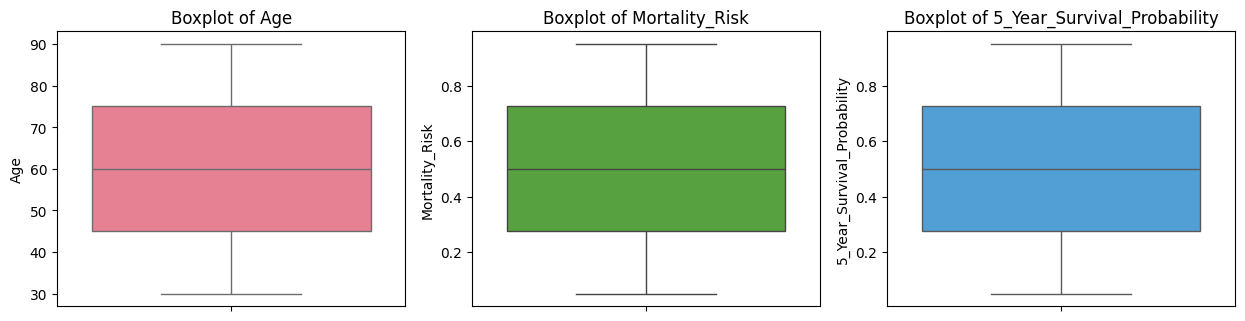

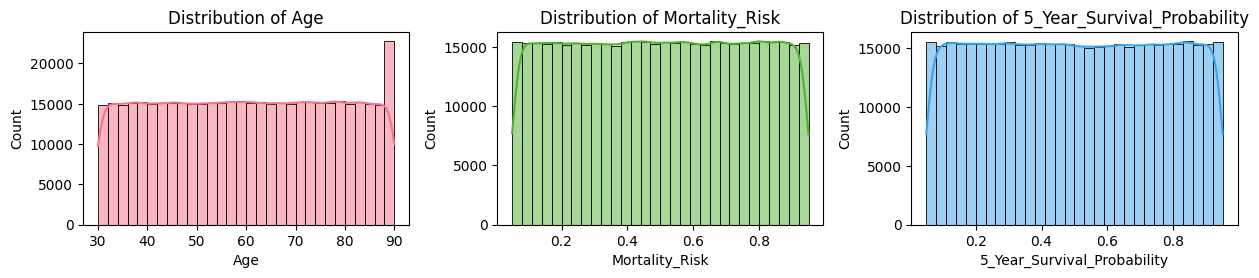

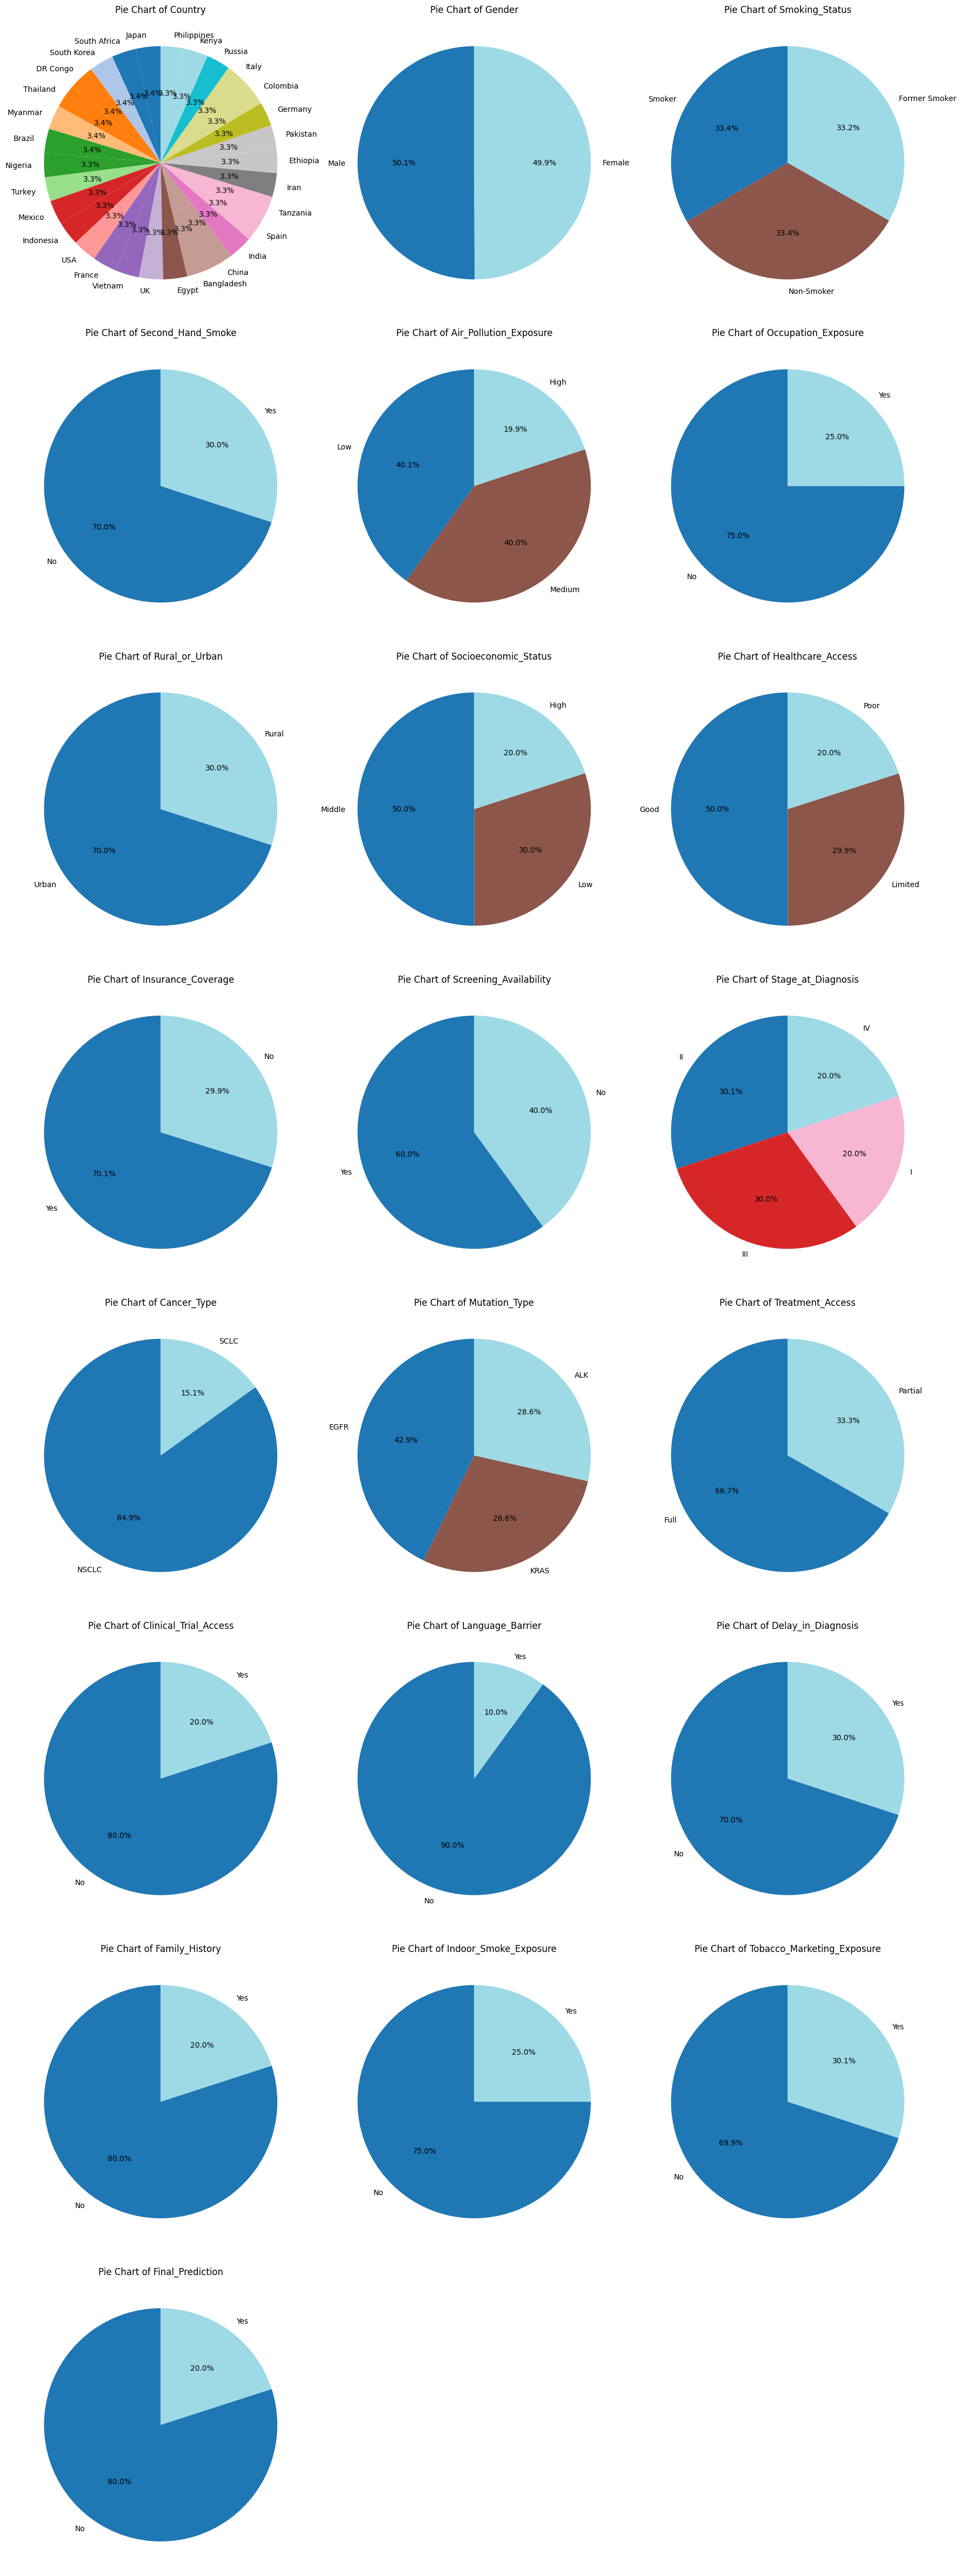

In [10]:
#call function
eda_visuals(df)

In [11]:
def eda_relationships(df, target_col="lung_cancer"):
    """
    Explore deeper relationships between features:
    - Correlation heatmap for numeric features
    - Countplots for categorical vs target
    - Boxplots for numeric vs target
    - Pairplot for selected features
    Dark theme is applied for better visual comfort.
    """

    # ☀️ White theme
    sns.set_theme(style="whitegrid", palette="pastel")
    plt.style.use("default")

    # Select numeric and categorical columns
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("patient_id", errors="ignore")
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns.drop(target_col, errors="ignore")

    # --- Correlation Heatmap ---
    plt.figure(figsize=(8, 6))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap="mako", center=0, linewidths=.5)
    plt.title("Correlation Heatmap (Numeric Features)", fontsize=14, color="w")
    plt.show()

    # --- Categorical vs Target ---
    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col, hue=target_col, palette="viridis")
        plt.title(f"{col} vs {target_col}", fontsize=14, color="w")
        plt.xticks(rotation=30)
        plt.show()

    # --- Numeric vs Target (Boxplots) ---
    for col in numeric_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=target_col, y=col, palette="plasma")
        plt.title(f"{col} Distribution by {target_col}", fontsize=14, color="w")
        plt.show()

    # --- Pairplot (Relationships) ---
    selected_features = list(numeric_cols) + [target_col]
    sns.pairplot(df[selected_features], hue=target_col, palette="cubehelix", diag_kind="kde")
    plt.suptitle("Pairwise Relationships", y=1.02, color="w", fontsize=14)
    plt.show()

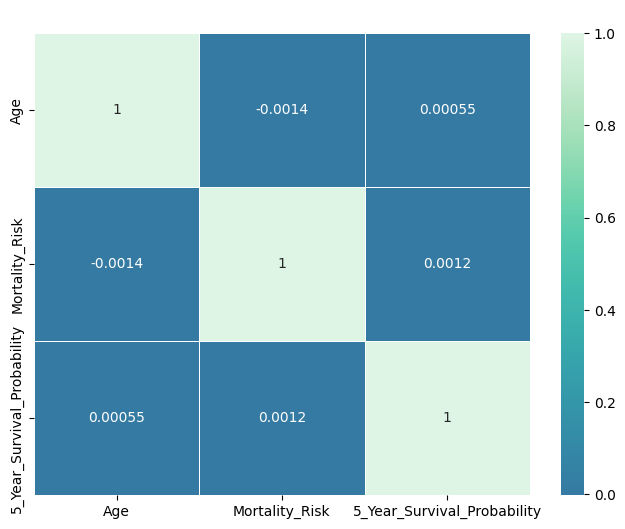

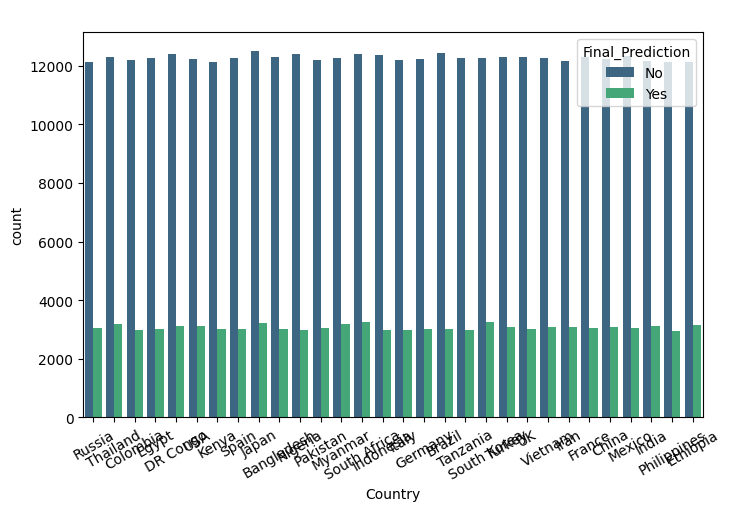

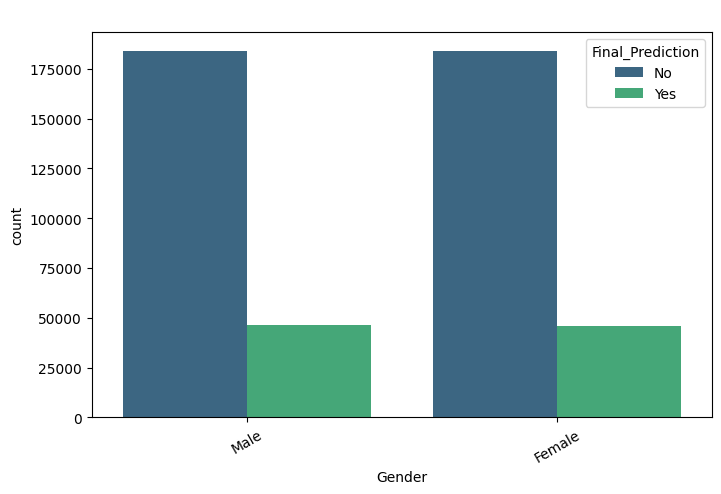

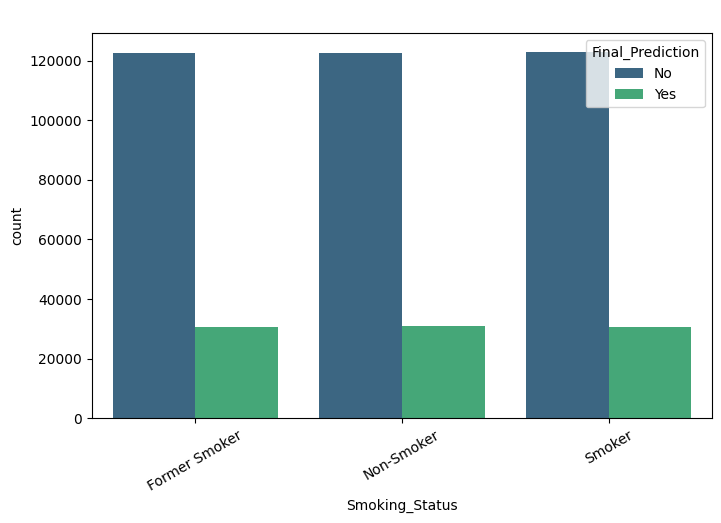

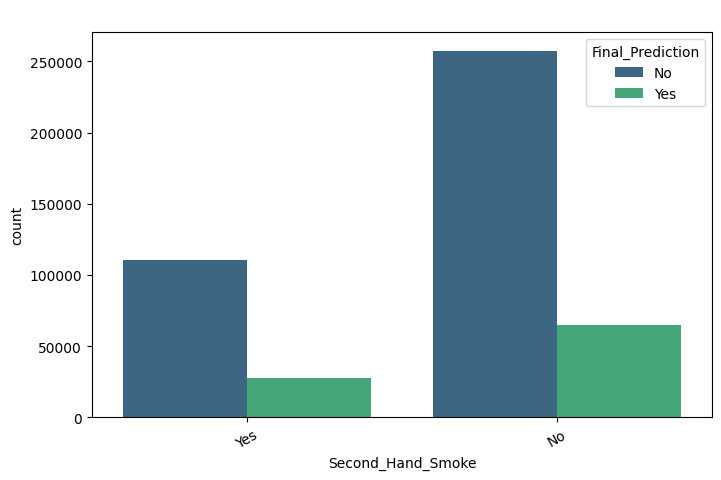

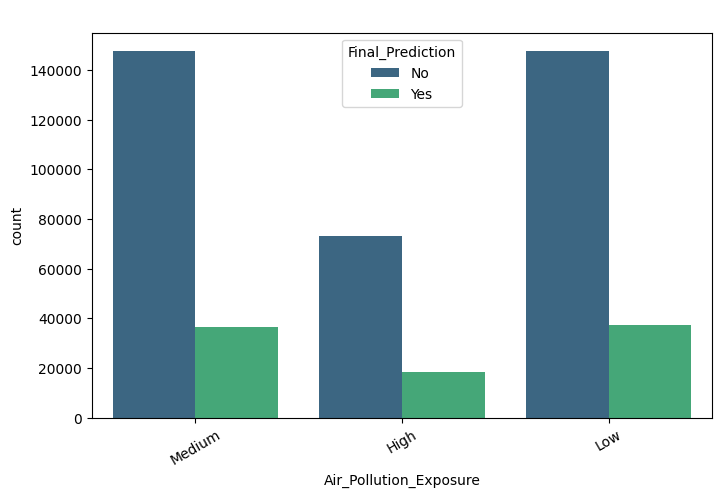

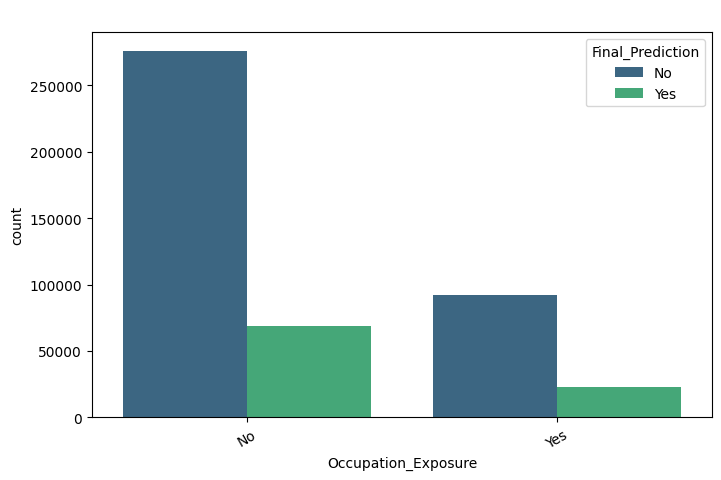

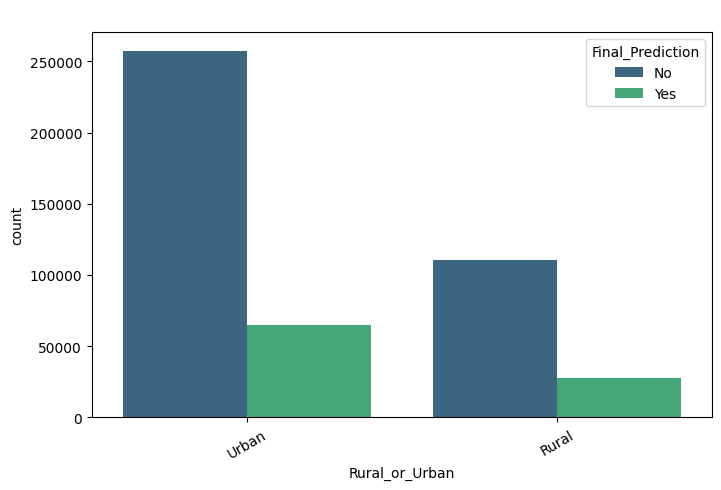

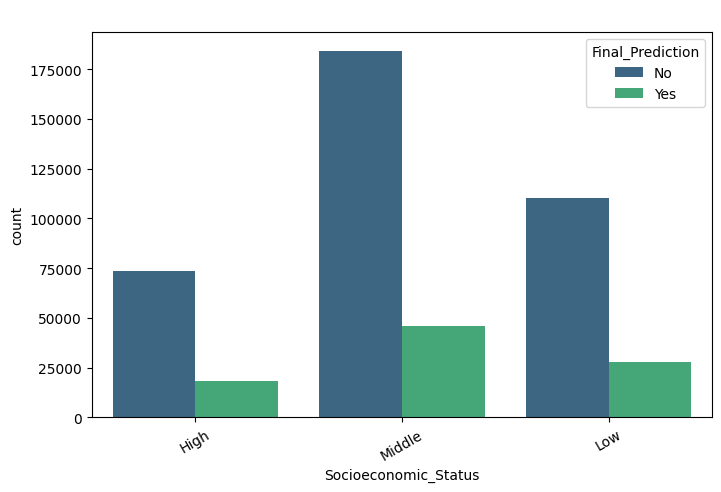

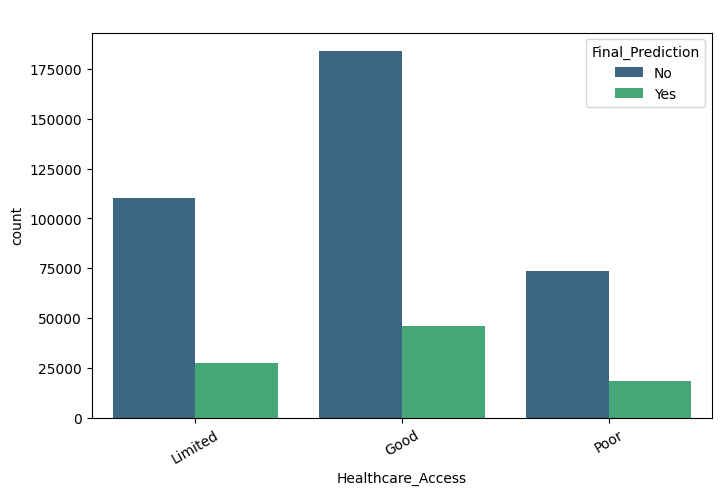

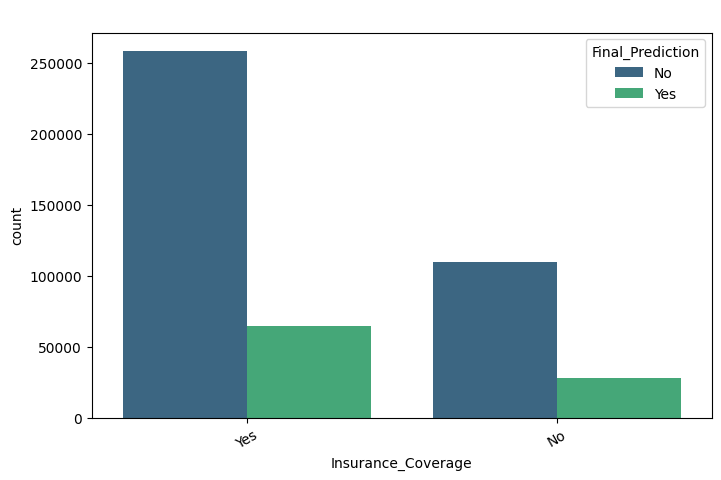

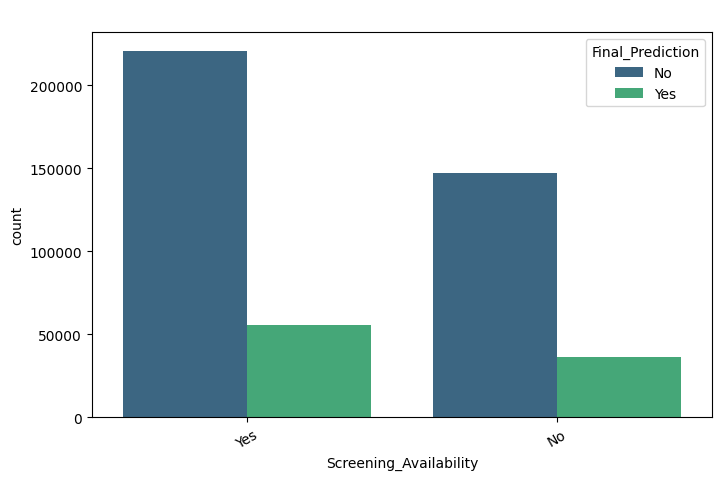

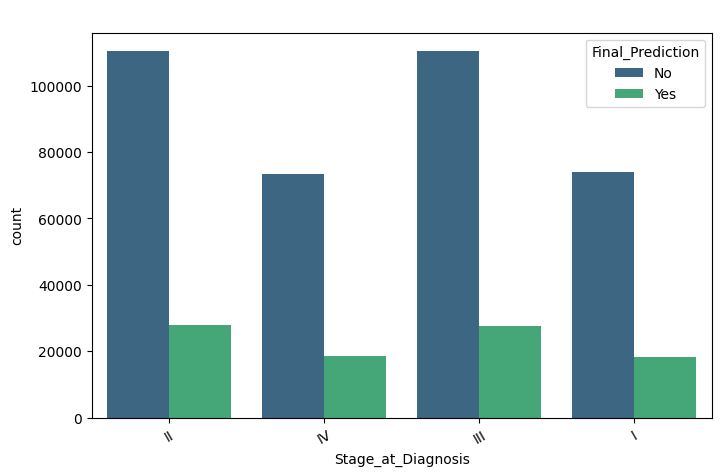

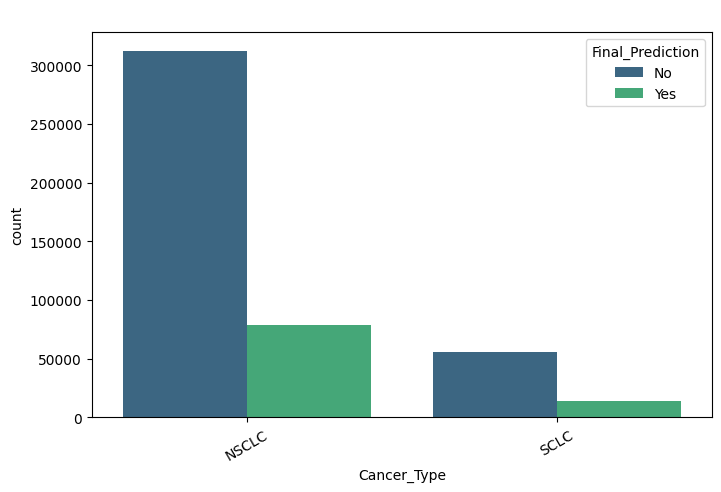

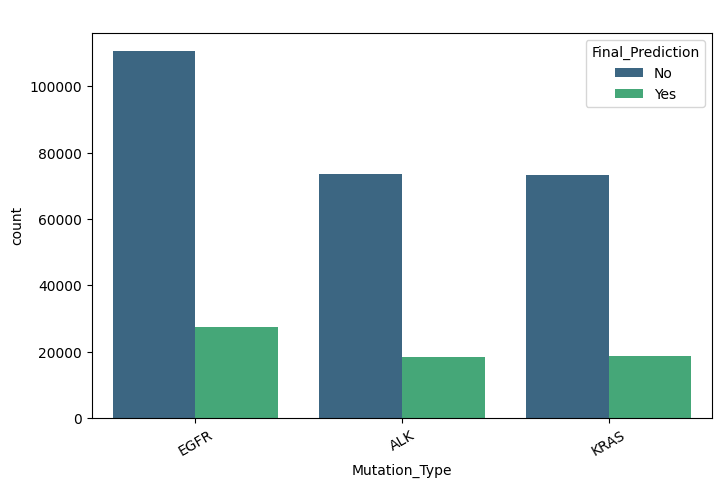

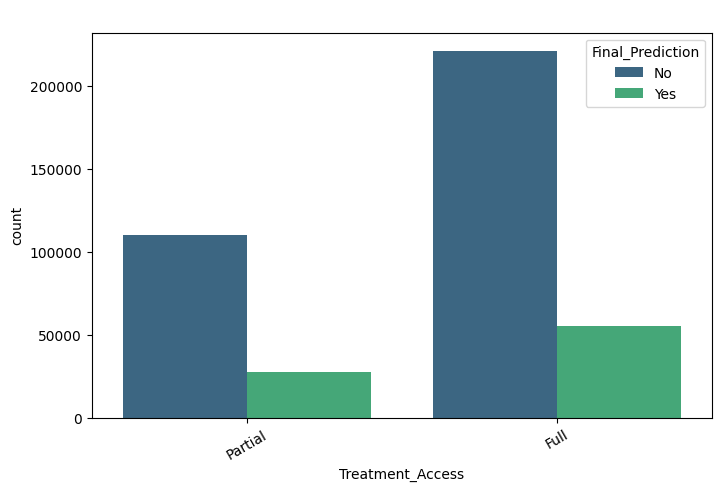

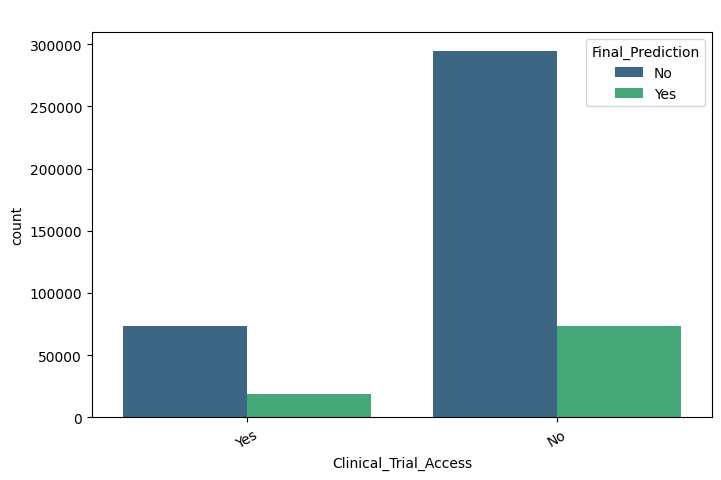

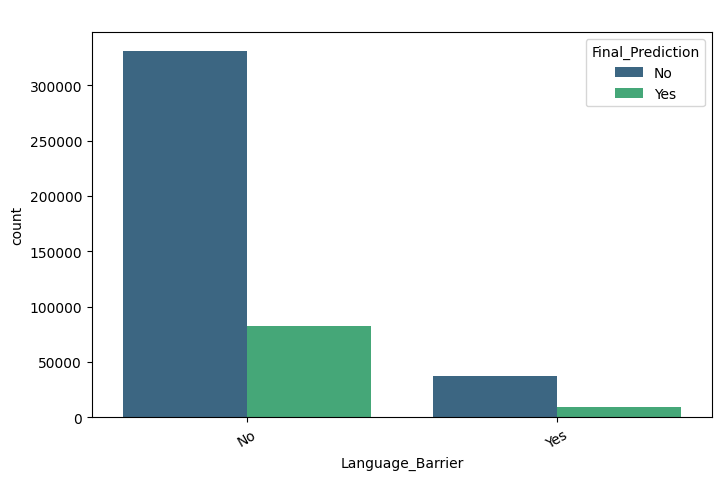

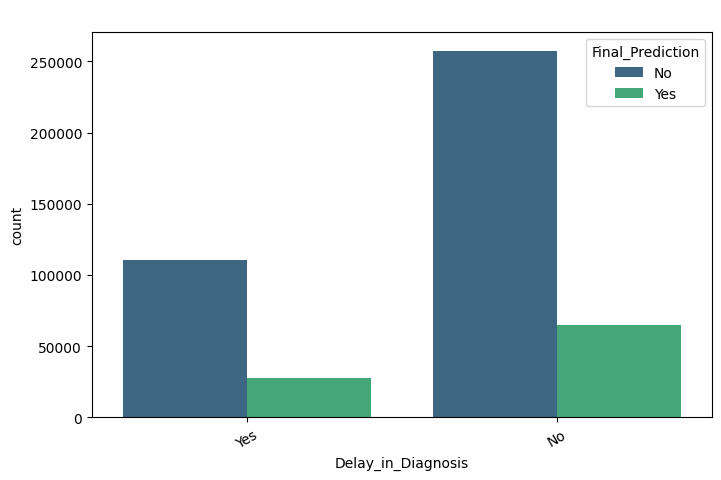

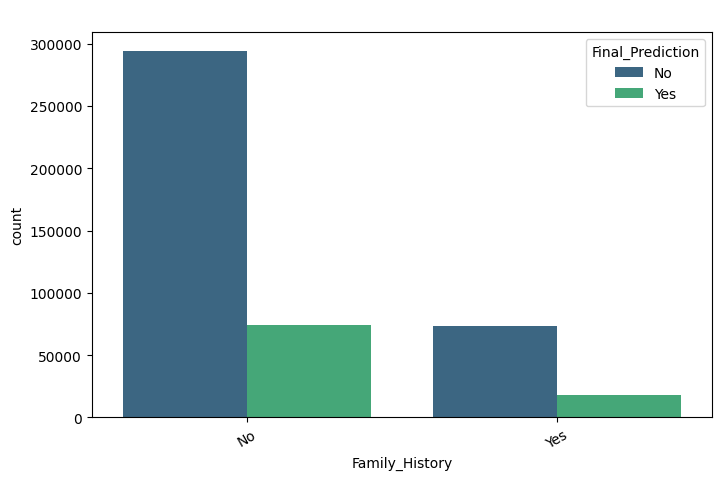

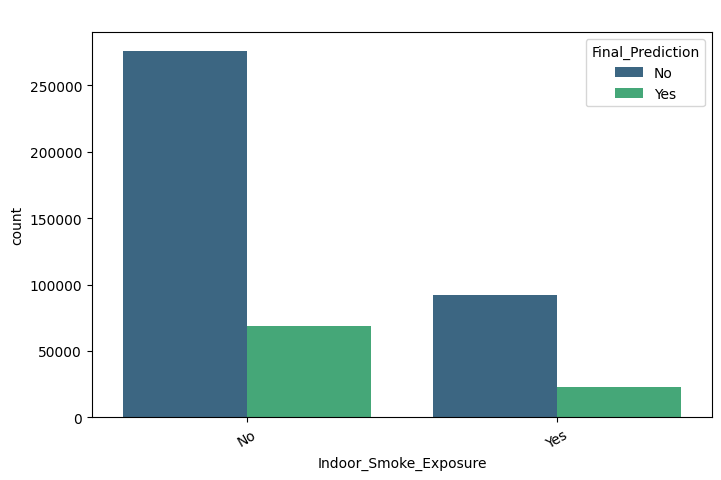

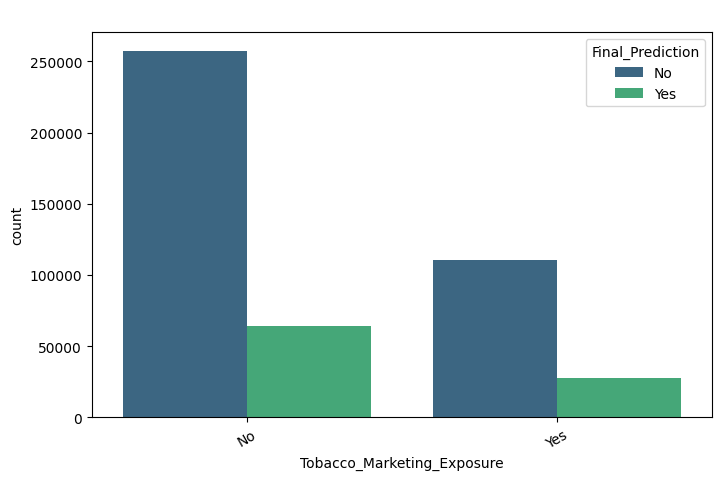

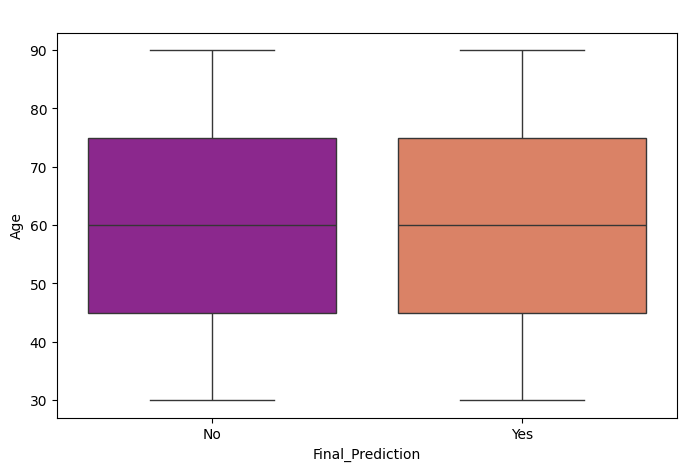

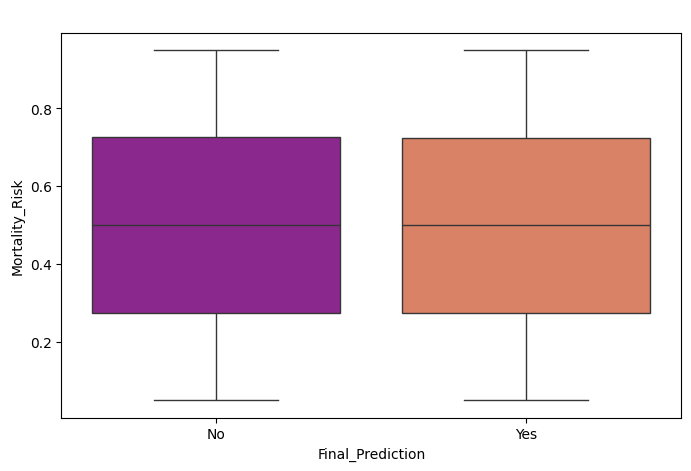

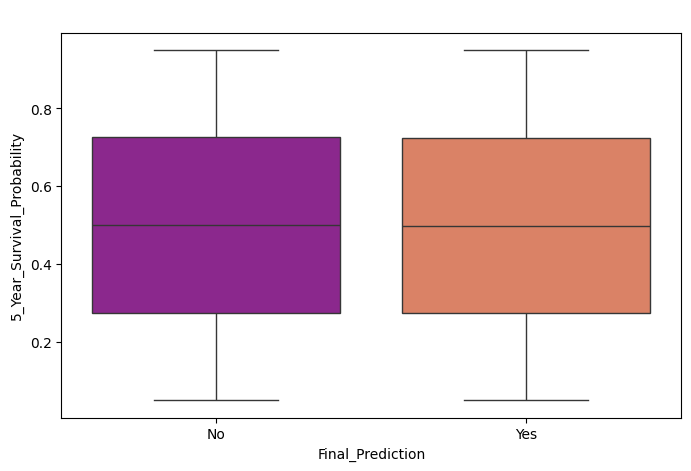

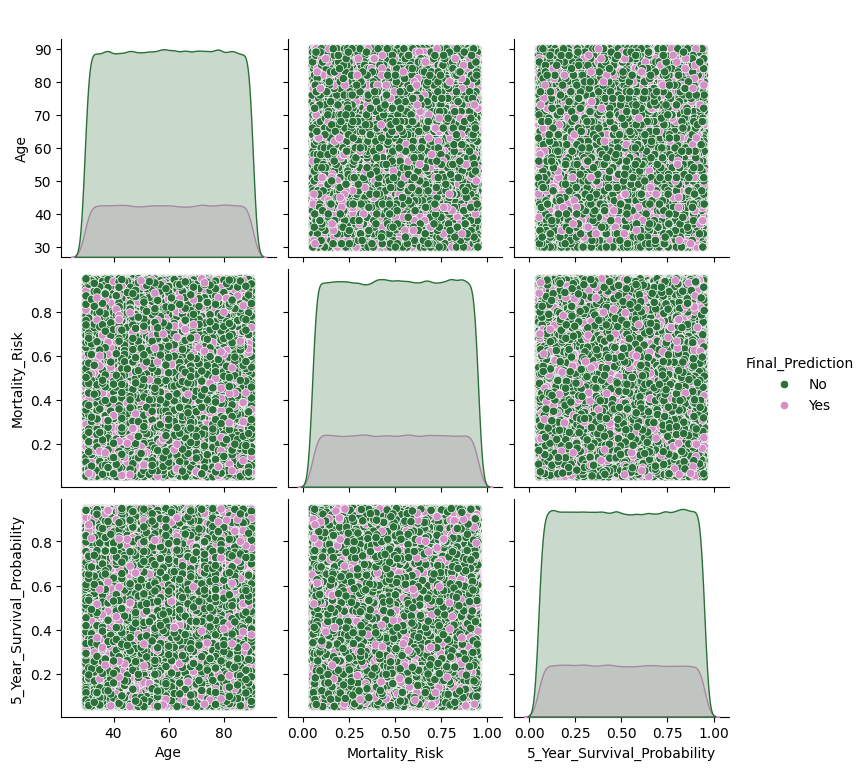

In [12]:
#call function
eda_relationships(df, target_col="Final_Prediction")

In [13]:
def eda_stats_tests_viz(df, target_col="lung_cancer"):
    """
    Perform statistical tests and visualize significance:
    - Chi-square test for categorical vs target
    - T-test / Mann-Whitney U test for numerical vs target
    - Returns a DataFrame with p-values
    - Generates barplot showing p-values for all features
    """

    results = []

    # Split columns
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("patient_id", errors="ignore")
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns.drop(target_col, errors="ignore")

    # --- Chi-Square Test (Categorical vs Target) ---
    for col in categorical_cols:
        contingency = pd.crosstab(df[col], df[target_col])
        chi2, p, dof, expected = chi2_contingency(contingency)
        results.append({
            "Feature": col,
            "Test": "Chi-square",
            "p-value": p,
            "Significant": "Yes ✅" if p < 0.05 else "No ❌"
        })

    # --- T-Test or Mann-Whitney (Numeric vs Target) ---
    for col in numeric_cols:
        groups = df.groupby(target_col)[col].apply(list)
        if len(groups) == 2:  # binary target
            group1, group2 = groups.iloc[0], groups.iloc[1]
            try:
                stat, p = ttest_ind(group1, group2, nan_policy="omit")
                test_used = "T-test"
            except:
                stat, p = mannwhitneyu(group1, group2, alternative="two-sided")
                test_used = "Mann-Whitney U"
            results.append({
                "Feature": col,
                "Test": test_used,
                "p-value": p,
                "Significant": "Yes ✅" if p < 0.05 else "No ❌"
            })

    df_results = pd.DataFrame(results)

    # --- Visualization ---
    plt.figure(figsize=(10,6))
    sns.barplot(
        data=df_results.sort_values("p-value"),
        x="p-value",
        y="Feature",
        hue="Significant",
        dodge=False,
        palette={"Yes ✅":"seagreen", "No ❌":"salmon"}
    )
    plt.axvline(0.05, color="yellow", linestyle="--", label="Significance Threshold (0.05)")
    plt.title("Feature Significance vs Target", fontsize=14)
    plt.xlabel("p-value")
    plt.ylabel("Feature")
    plt.legend()
    plt.show()

    return df_results

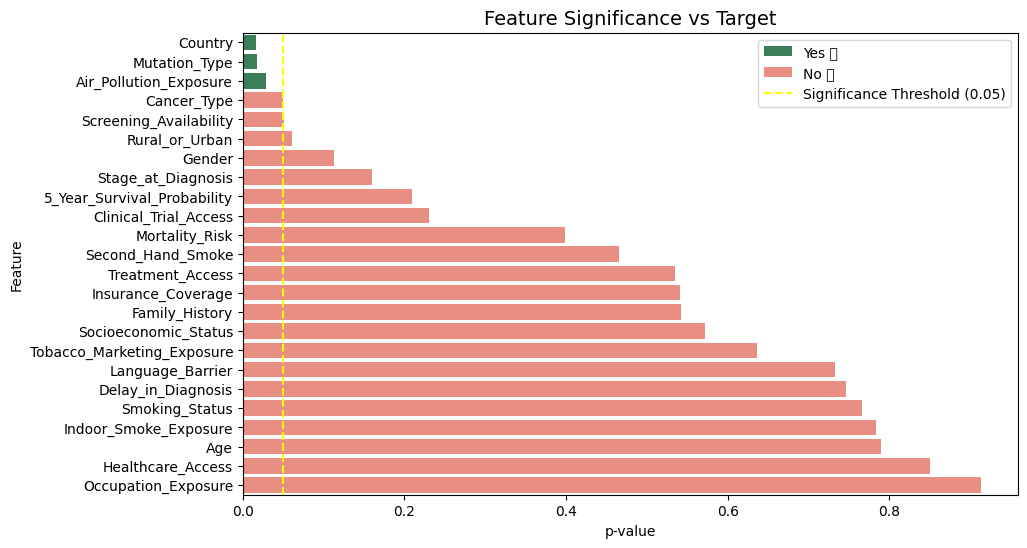

,Feature,Test,p-value,Significant
0,Country,Chi-square,0.016550,Yes ✅
1,Gender,Chi-square,0.113052,No ❌
2,Smoking_Status,Chi-square,0.766622,No ❌
3,Second_Hand_Smoke,Chi-square,0.466080,No ❌
4,Air_Pollution_Exposure,Chi-square,0.028773,Yes ✅
5,Occupation_Exposure,Chi-square,0.913595,No ❌
6,Rural_or_Urban,Chi-square,0.060817,No ❌
7,Socioeconomic_Status,Chi-square,0.571912,No ❌
8,Healthcare_Access,Chi-square,0.851003,No ❌
9,Insurance_Coverage,Chi-square,0.541324,No ❌


In [14]:
#call function
stats= eda_stats_tests_viz(df, target_col="Final_Prediction")
#show
stats

In [16]:
features =df[['Air_Pollution_Exposure','Occupation_Exposure','Second_Hand_Smoke','Healthcare_Access',
              'Smoking_Status','Family_History','Age','Final_Prediction']]

In [17]:
#convert categorical to Numerical
features = features.copy()
features.loc[:,'Final_Prediction'] = features['Final_Prediction'].map({'Yes': 1, 'No': 0})

In [18]:
features.head()

,Air_Pollution_Exposure,Occupation_Exposure,Second_Hand_Smoke,Healthcare_Access,Smoking_Status,Family_History,Age,Final_Prediction
0,Medium,No,Yes,Limited,Former Smoker,No,82,0
1,High,No,No,Good,Former Smoker,No,66,0
2,Medium,No,No,Poor,Former Smoker,No,87,0
3,Low,Yes,No,Good,Former Smoker,No,51,0
4,High,No,No,Good,Former Smoker,No,43,0


In [19]:
#call Label encoder from Sklearn to convert features
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

for col in features:
    features[col] = le.fit_transform(features[col])

In [20]:
#show after Encoded
features.head()

,Air_Pollution_Exposure,Occupation_Exposure,Second_Hand_Smoke,Healthcare_Access,Smoking_Status,Family_History,Age,Final_Prediction
0,2,0,1,1,0,0,52,0
1,0,0,0,0,0,0,36,0
2,2,0,0,2,0,0,57,0
3,1,1,0,0,0,0,21,0
4,0,0,0,0,0,0,13,0


In [21]:
X=features.iloc[:,:-1]
y=features.iloc[:,-1]

In [22]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#show train data after splited
X_train.head()

,Air_Pollution_Exposure,Occupation_Exposure,Second_Hand_Smoke,Healthcare_Access,Smoking_Status,Family_History,Age
23597,2,1,0,0,2,0,33
268308,1,0,1,1,0,1,12
30313,2,0,0,1,2,0,56
124449,1,1,1,0,2,0,57
454610,2,0,0,0,0,1,29


In [24]:
#show traget in data after split
y_train.head()

,Final_Prediction
23597,0
268308,0
30313,0
124449,1
454610,0



DecisionTreeClassifier Validation Accuracy: 0.7984

DecisionTreeClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     73698
           1       0.18      0.00      0.01     18361

    accuracy                           0.80     92059
   macro avg       0.49      0.50      0.45     92059
weighted avg       0.68      0.80      0.71     92059



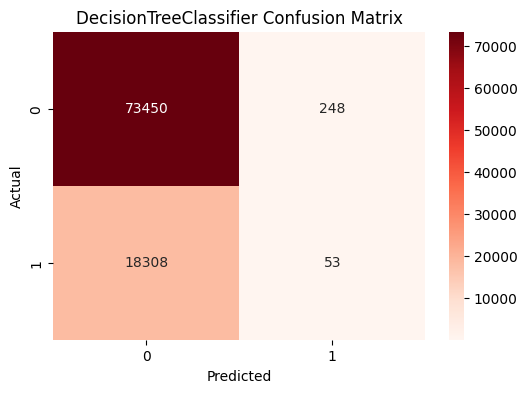

In [25]:
# DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_val_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_val_pred)
dt_class_report = classification_report(y_test, dt_val_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_val_pred)

print("\nDecisionTreeClassifier Validation Accuracy: {:.4f}".format(dt_accuracy))
print("\nDecisionTreeClassifier Classification Report:\n", dt_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('DecisionTreeClassifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


RandomForestClassifier Validation Accuracy: 0.7974

RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89     73698
           1       0.18      0.00      0.01     18361

    accuracy                           0.80     92059
   macro avg       0.49      0.50      0.45     92059
weighted avg       0.68      0.80      0.71     92059



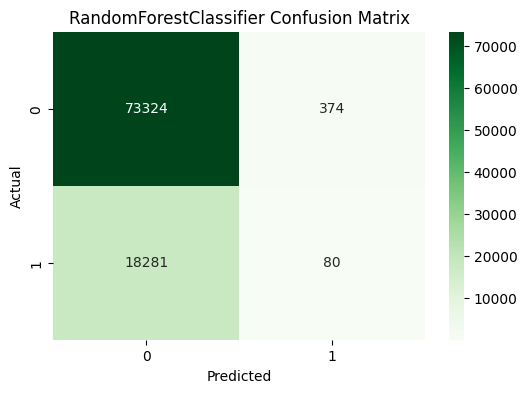

In [26]:
# RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_val_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_val_pred)
rf_class_report = classification_report(y_test, rf_val_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_val_pred)

print("\nRandomForestClassifier Validation Accuracy: {:.4f}".format(rf_accuracy))
print("\nRandomForestClassifier Classification Report:\n", rf_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('RandomForestClassifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


KNN Classifier Validation Accuracy: 0.7639

KNN Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86     73698
           1       0.20      0.06      0.09     18361

    accuracy                           0.76     92059
   macro avg       0.50      0.50      0.48     92059
weighted avg       0.68      0.76      0.71     92059



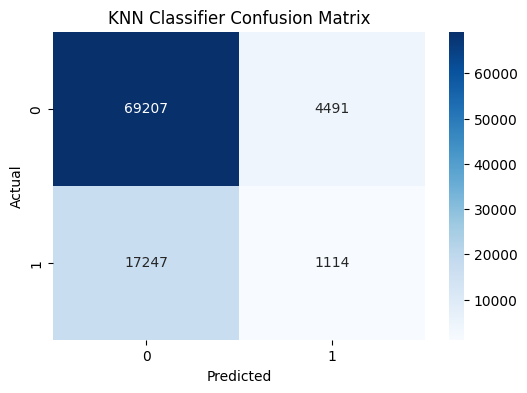

In [27]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_val_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_val_pred)
knn_class_report = classification_report(y_test, knn_val_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_val_pred)

print("\nKNN Classifier Validation Accuracy: {:.4f}".format(knn_accuracy))
print("\nKNN Classifier Classification Report:\n", knn_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Naive Bayes Classifier Validation Accuracy: 0.8006

Naive Bayes Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     73698
           1       0.00      0.00      0.00     18361

    accuracy                           0.80     92059
   macro avg       0.40      0.50      0.44     92059
weighted avg       0.64      0.80      0.71     92059



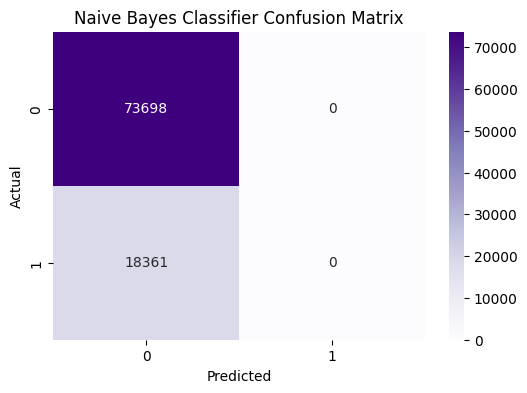

In [28]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_val_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_val_pred)
nb_class_report = classification_report(y_test, nb_val_pred)
nb_conf_matrix = confusion_matrix(y_test, nb_val_pred)

print("\nNaive Bayes Classifier Validation Accuracy: {:.4f}".format(nb_accuracy))
print("\nNaive Bayes Classifier Classification Report:\n", nb_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('Naive Bayes Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Mapping of K-Means Clusters to Actual Classes:
{0: 0, 1: 0}

K-Means (attempted classification) Accuracy: 0.7997

K-Means (attempted classification) Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89    368107
           1       0.00      0.00      0.00     92185

    accuracy                           0.80    460292
   macro avg       0.40      0.50      0.44    460292
weighted avg       0.64      0.80      0.71    460292



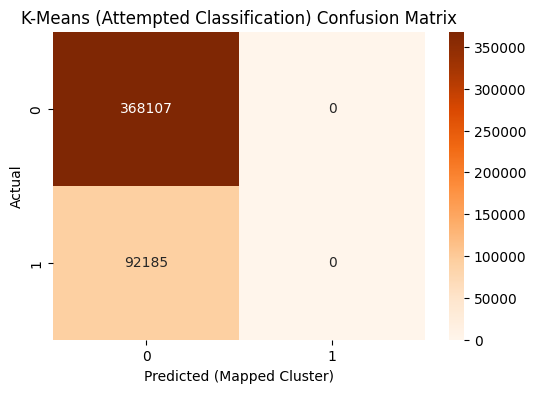

In [29]:
# K-Means Clustering (Note: This is for clustering, not typically used directly for classification like the previous models)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters (e.g., using the Elbow method or Silhouette score)
# For demonstration, let's assume we want 2 clusters (corresponding to the two classes in Final_Prediction)
# In a real-world scenario, you would explore different numbers of clusters.

# Since K-Means is unsupervised, we'll use the features (X) without the target variable (y)
# It's often beneficial to scale the data before applying K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Initialize and fit the K-Means model
# We set n_clusters to 2 to align with the target variable's classes (0 and 1), for demonstration
# In a true clustering task, you would determine the optimal n_clusters differently.
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # Added n_init for KMeans
kmeans.fit(X_scaled)

# Get the cluster assignments for each data point
clusters = kmeans.labels_

# You can evaluate the clustering performance using metrics like Silhouette Score
# print(f"Silhouette Score: {silhouette_score(X_scaled, clusters):.4f}")

# To *attempt* to use this for classification (again, not a standard approach):
# You would typically map the cluster labels to your actual class labels (0 and 1)
# This requires inspecting which cluster corresponds to which class based on your labeled data.
# This mapping can be ambiguous and is not guaranteed to align well.

# For a simplistic demonstration, let's create a 'predicted' class based on the cluster assignments
# We need to figure out which cluster corresponds to which 'Final_Prediction' class.
# This requires comparing the cluster assignments to the original 'Final_Prediction' labels.

# Let's create a temporary DataFrame to easily compare clusters and actual labels
temp_df = pd.DataFrame({'Cluster': clusters, 'Actual': y})

# Find the mapping from cluster label to actual label (most frequent actual label within each cluster)
cluster_to_class = temp_df.groupby('Cluster')['Actual'].agg(lambda x: x.mode()[0]).to_dict()

print("Mapping of K-Means Clusters to Actual Classes:")
print(cluster_to_class)

# Map the cluster assignments to the predicted class labels
kmeans_pred_class = np.array([cluster_to_class[cluster] for cluster in clusters])

# Now you can evaluate this *attempted* classification using standard classification metrics
# Note: This evaluation is just to show how the clusters align with the actual classes,
# it doesn't mean K-Means is a good classifier for this problem.
kmeans_accuracy = accuracy_score(y, kmeans_pred_class)
kmeans_class_report = classification_report(y, kmeans_pred_class)
kmeans_conf_matrix = confusion_matrix(y, kmeans_pred_class)


print("\nK-Means (attempted classification) Accuracy: {:.4f}".format(kmeans_accuracy))
print("\nK-Means (attempted classification) Classification Report:\n", kmeans_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(kmeans_conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.title('K-Means (Attempted Classification) Confusion Matrix')
plt.xlabel('Predicted (Mapped Cluster)')
plt.ylabel('Actual')
plt.show()

While K-Means is a powerful algorithm, it's primarily used for **clustering**, an unsupervised learning technique where the goal is to group similar data points together based on their features.

In contrast, your task of predicting `Final_Prediction` is a **classification** problem, which falls under supervised learning. Classification models are trained on labeled data (like your `X_train` and `y_train`) to learn the relationship between features and a target variable.

Using K-Means for classification directly is not standard practice. You could potentially use it in a hybrid approach (e.g., as a feature engineering step), but for directly predicting the `Final_Prediction` column, classification algorithms are more appropriate.

In [ ]:
# Support Vector Machine (SVM) Classifier
from sklearn.svm import SVC

# Initialize and train the SVM model
# SVM can be computationally expensive on large datasets.
# Consider using a linear kernel or a smaller subset of data for faster training if needed.
# For demonstration, we'll use a radial basis function (RBF) kernel.
# You might need to tune hyperparameters like C and gamma for optimal performance.
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
svm_val_pred = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_val_pred)
svm_class_report = classification_report(y_test, svm_val_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_val_pred)

print("\nSVM Classifier Validation Accuracy: {:.4f}".format(svm_accuracy))
print("\nSVM Classifier Classification Report:\n", svm_class_report)

# Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('SVM Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
try:
    from xgboost import XGBClassifier
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_val_pred = xgb_model.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, xgb_val_pred)
    xgb_class_report = classification_report(y_test, xgb_val_pred)
    xgb_conf_matrix = confusion_matrix(y_test, xgb_val_pred)

    print("\nXGBoostClassifier Validation Accuracy: {:.4f}".format(xgb_accuracy))
    print("\nXGBoostClassifier Classification Report:\n", xgb_class_report)
    plt.figure(figsize=(6,4))
    sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.title('XGBoostClassifier Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
except ImportError:
    print("XGBoost is not installed.")

In [ ]:
#bulding Deeplearning model (layers)
input_dl = X_train.shape[1]
model = keras.Sequential([
    layers.Input(shape=(input_dl,)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
#model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='AUC')]
)
model.summary()

In [ ]:
#Number of samples for each class.
print(pd.Series(y_train).value_counts())

In [ ]:
#Percentage of each class
print(pd.Series(y_train).value_counts(normalize=True) * 100)

In [ ]:
pd.Series(y_train).value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [ ]:
#It retrieves the different categories (labels) present in the data y_train
def get_class_weights(y):
    #Extracting clades
    classes = np.unique(y)

    #Calculate weights using balanced
    class_weights = compute_class_weight(class_weight='balanced',
                                         classes=classes,
                                         y=y)
    class_weight_dict = dict(zip(classes, class_weights))

    print("Class weights:", class_weight_dict)
    return class_weight_dict

In [ ]:
#show the result
weights = get_class_weights(y_train)

In [ ]:
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=classes,
                                     y=y_train)

class_weight_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weight_dict)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    class_weight=class_weight_dict,
    verbose=1
)

In [ ]:
#evaluate for new data
test_loss, test_acc, test_auc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['AUC'], label='train_AUC')
plt.plot(history.history['val_AUC'], label='val_AUC')
plt.title('AUC')
plt.legend()
plt.show()


In [ ]:
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

print('Test ROC AUC:', roc_auc_score(y_test, y_pred_prob))
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [ ]:
# features
n_features = X_train.shape[1]

# randam 10 samples
random_samples = np.random.rand(10, n_features)

# model predict
preds = model.predict(random_samples).flatten()

# class predicting
classes = (preds > 0.5).astype(int)

#  DataFrame
df_results = pd.DataFrame({
    "Sample_ID": range(1, 11),
    "Predicted_Probability": preds,
    "Predicted_Class": classes
})

print(df_results)

# bar plot
plt.figure(figsize=(8,5))
plt.bar(df_results["Sample_ID"], df_results["Predicted_Probability"], color="skyblue", edgecolor="black")
plt.axhline(0.5, color="red", linestyle="--", label="Threshold = 0.5")
plt.xticks(df_results["Sample_ID"])
plt.xlabel("Sample ID")
plt.ylabel("Predicted Probability")
plt.title("Predictions on Random Samples")
plt.legend()
plt.show()